In [ ]:
#Εισαγωγή βιβλιοθηκών
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
#Φόρτωση συνόλου δεδομένων
df = pd.read_csv("https://raw.githubusercontent.com/kdemertzis/EKPA/refs/heads/main/Data/DarkNet.csv")
df.head()

/tmp/ipython-input-659659967.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/kdemertzis/EKPA/refs/heads/main/Data/DarkNet.csv")


,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label-1,Label-2
0,10.152.152.11,57158,216.58.220.99,443,6,229,1,1,0,0,...,0,0,0,0,0,0.000,0,0,Non-Tor,AUDIO-STREAMING
1,10.152.152.11,57159,216.58.220.99,443,6,407,1,1,0,0,...,0,0,0,0,0,0.000,0,0,Non-Tor,AUDIO-STREAMING
2,10.152.152.11,57160,216.58.220.99,443,6,431,1,1,0,0,...,0,0,0,0,0,0.000,0,0,Non-Tor,AUDIO-STREAMING
3,10.152.152.11,49134,74.125.136.120,443,6,359,1,1,0,0,...,0,0,0,0,0,0.000,0,0,Non-Tor,AUDIO-STREAMING
4,10.152.152.11,34697,173.194.65.127,19305,6,10778451,591,400,64530,6659,...,0,0,0,0,1437760000000000,3117718.131,1437760000000000,1437760000000000,Non-Tor,AUDIO-STREAMING


In [ ]:
#Διερευνητική Ανάλυση Δεδομένων
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68580 entries, 0 to 68579
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Src_IP                      68580 non-null  object 
 1   Src_Port                    68580 non-null  int64  
 2   Dst_IP                      68580 non-null  object 
 3   Dst_Port                    68580 non-null  int64  
 4   Protocol                    68580 non-null  int64  
 5   Flow_Duration               68580 non-null  int64  
 6   Total_Fwd_Packet            68580 non-null  int64  
 7   Total_Bwd_packets           68580 non-null  int64  
 8   Total_Length_of_Fwd_Packet  68580 non-null  int64  
 9   Total_Length_of_Bwd_Packet  68580 non-null  int64  
 10  Fwd_Packet_Length_Max       68580 non-null  int64  
 11  Fwd_Packet_Length_Min       68580 non-null  int64  
 12  Fwd_Packet_Length_Mean      68580 non-null  float64
 13  Fwd_Packet_Length_Std       685

,Src_Port,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,68580.000000,68580.000000,68580.000000,6.858000e+04,68580.000000,68580.000000,6.858000e+04,6.858000e+04,68580.000000,68580.000000,...,68580.000000,68580.000000,68580.0,68580.0,68580.0,68580.0,6.858000e+04,6.858000e+04,6.858000e+04,6.858000e+04
mean,39726.052041,14235.135200,10.978798,2.405470e+07,291.265777,284.729513,2.286576e+05,2.418586e+05,229.046165,18.948936,...,188.358399,15.521260,0.0,0.0,0.0,0.0,6.294694e+14,4.875483e+13,6.540864e+14,5.407995e+14
std,19362.966799,20255.302047,5.577292,4.049607e+07,3399.455076,4873.361494,4.667583e+06,6.522065e+06,846.294647,36.286681,...,2260.533013,8.088541,0.0,0.0,0.0,0.0,6.984537e+14,1.820131e+14,7.179893e+14,6.981754e+14
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,32898.000000,80.000000,6.000000,1.225882e+05,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,8.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,45126.000000,4644.000000,6.000000,4.201030e+05,2.000000,1.000000,4.400000e+01,0.000000e+00,33.000000,0.000000,...,1.000000,20.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,54712.000000,28326.000000,17.000000,2.716053e+07,5.000000,3.000000,3.360000e+02,2.180000e+02,108.000000,33.000000,...,2.000000,20.000000,0.0,0.0,0.0,0.0,1.433530e+15,1.807551e+07,1.437150e+15,1.433530e+15
max,65534.000000,65533.000000,17.000000,1.200000e+08,238161.000000,470862.000000,7.693074e+08,6.704287e+08,64240.000000,1350.000000,...,113325.000000,44.000000,0.0,0.0,0.0,0.0,1.460000e+15,1.030000e+15,1.460000e+15,1.460000e+15


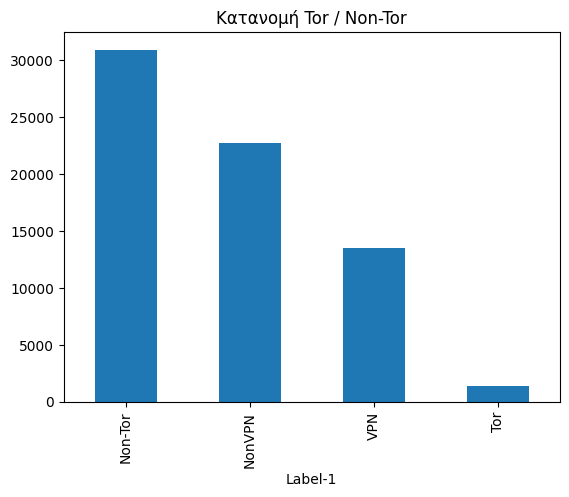

In [ ]:
#Κατανομή κλάσεων
df['Label-1'].value_counts().plot(kind='bar')
plt.title("Κατανομή Tor / Non-Tor")
plt.show()

In [ ]:
#Προεπεξεργασία δεδομένων
df.isnull().sum()

,0
Src_IP,0
Src_Port,0
Dst_IP,0
Dst_Port,0
Protocol,0
...,...
Idle_Std,0
Idle_Max,0
Idle_Min,0
Label-1,0


In [ ]:
#Μετατροπή της στήλης Flow_Bytes σε αριθμητική
df['Flow_Bytes/s'] = pd.to_numeric(df['Flow_Bytes/s'], errors='coerce')
df['Flow_Bytes/s'] = df['Flow_Bytes/s'].fillna(df['Flow_Bytes/s'].mean())

#Αφαίρεση μη αριθμητικών στηλών
X = df.drop(['Label-1', 'Label-2', 'Src_IP', 'Dst_IP'], axis=1)
y = df['Label-1']

#Διαχείριση άπειρων τιμών
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

#Κανονικοποίηση δεδομένων
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Διαχωρισμός σε train/test set

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [ ]:
#Random Forest Classifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy RF:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy RF: 0.9697190628949159
              precision    recall  f1-score   support

     Non-Tor       1.00      1.00      1.00      9266
      NonVPN       0.95      0.96      0.96      6806
         Tor       0.95      0.90      0.92       425
         VPN       0.94      0.93      0.93      4077

    accuracy                           0.97     20574
   macro avg       0.96      0.95      0.95     20574
weighted avg       0.97      0.97      0.97     20574



In [ ]:
#Σύκριση/Logistic Regression

#Εκπαίδευση μοντέλου Logistic Regression
logistic_model = LogisticRegression(random_state=42, solver='liblinear')
logistic_model.fit(X_train, y_train)

#Προβλέψεις στο test set
y_pred_logistic = logistic_model.predict(X_test)

#Αξιολόγηση μοντέλου Logistic Regression
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

Logistic Regression Performance:
Accuracy: 0.8049
Classification Report:
               precision    recall  f1-score   support

     Non-Tor       0.86      0.90      0.88      9266
      NonVPN       0.74      0.77      0.76      6806
         Tor       0.95      0.74      0.83       425
         VPN       0.75      0.66      0.70      4077

    accuracy                           0.80     20574
   macro avg       0.83      0.77      0.79     20574
weighted avg       0.80      0.80      0.80     20574

Confusion Matrix:
 [[8331  913    3   19]
 [ 735 5220   12  839]
 [  10   62  314   39]
 [ 562  816    3 2696]]


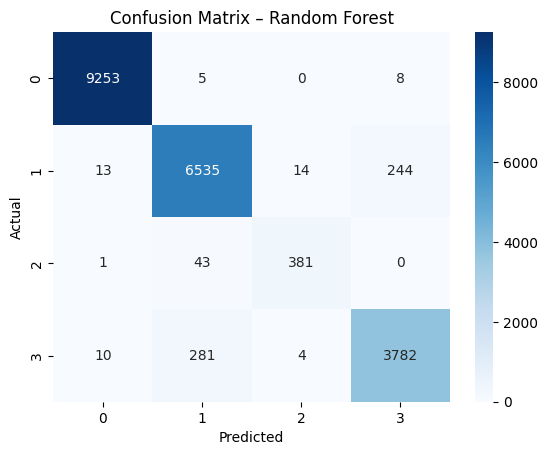

In [ ]:
#Confusion matrix

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()


#Συμπέρασμα
Το μοντέλο Random Forest παρουσιάζει υψηλή απόδοση και είναι κατάλληλο ως μηχανισμός IDS με δυνατότητα IPS.